In [4]:
# Dependencies

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from config import (gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [9]:
shootingdata = pd.read_csv("./Resources/shotspotterdata.csv")
shootingdata.head()

ID               Type      Date     Time          Source  Lat (100)  \
0   5D69913  Multiple_Gunshots  1-Jan-17  0:00:06  WashingtonDC5D     38.909   
1  6D174826  Multiple_Gunshots  1-Jan-17  0:00:09  WashingtonDC6D     38.886   
2   4D58125  Multiple_Gunshots  1-Jan-17  0:00:12  WashingtonDC4D     38.950   
3   5D69915  Multiple_Gunshots  1-Jan-17  0:00:29  WashingtonDC5D     38.927   
4   4D58126  Multiple_Gunshots  1-Jan-17  0:00:36  WashingtonDC4D     38.943   

   Lon (100)  
0    -76.986  
1    -76.951  
2    -77.025  
3    -76.974  
4    -77.016

In [12]:
shootingdata = shootingdata.rename(columns={"Source": "Deparment", "Lat (100)": "latitude", "Lon (100)": "longitude"})
shootingdata.columns

Index(['ID', 'Type', 'Date', 'Time', 'Deparment', 'latitude', 'longitude'], dtype='object')

In [13]:
shootingdata.head()

ID               Type      Date     Time       Deparment  latitude  \
0   5D69913  Multiple_Gunshots  1-Jan-17  0:00:06  WashingtonDC5D    38.909   
1  6D174826  Multiple_Gunshots  1-Jan-17  0:00:09  WashingtonDC6D    38.886   
2   4D58125  Multiple_Gunshots  1-Jan-17  0:00:12  WashingtonDC4D    38.950   
3   5D69915  Multiple_Gunshots  1-Jan-17  0:00:29  WashingtonDC5D    38.927   
4   4D58126  Multiple_Gunshots  1-Jan-17  0:00:36  WashingtonDC4D    38.943   

   longitude  
0    -76.986  
1    -76.951  
2    -77.025  
3    -76.974  
4    -77.016

In [19]:

locations = shootingdata[['latitude', 'longitude']]

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,  
                                 dissipating=False, max_intensity=1,
                                 point_radius = 0.004)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 0.004
heat_layer.point_radius = 0.004

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
df_new = shootingdata.loc[:,['Deparment','ID','Type']]
shotsByDeparment = df_new.groupby(['Deparment','Type'])
shotsByDeparment.head()

Deparment        ID                    Type
0     WashingtonDC5D   5D69913       Multiple_Gunshots
1     WashingtonDC6D  6D174826       Multiple_Gunshots
2     WashingtonDC4D   4D58125       Multiple_Gunshots
3     WashingtonDC5D   5D69915       Multiple_Gunshots
4     WashingtonDC4D   4D58126       Multiple_Gunshots
5     WashingtonDC3D   3D61609  Gunshot_or_Firecracker
6     WashingtonDC7D  7D215868       Multiple_Gunshots
7     WashingtonDC3D   3D61613          Single_Gunshot
8     WashingtonDC5D   5D69916       Multiple_Gunshots
9     WashingtonDC4D   4D58135       Multiple_Gunshots
10    WashingtonDC4D   4D58136       Multiple_Gunshots
11    WashingtonDC1D   1D84592       Multiple_Gunshots
12    WashingtonDC7D  7D215874       Multiple_Gunshots
13    WashingtonDC6D  6D174829       Multiple_Gunshots
14    WashingtonDC1D   1D84593       Multiple_Gunshots
15    WashingtonDC7D  7D215875       Multiple_Gunshots
16    WashingtonDC1D   1D84595       Multiple_Gunshots
17    WashingtonDC6D  6D174833       Multiple_Gunshots
18    WashingtonDC7D  7D215880       Multiple_Gunshots
19    WashingtonDC4D   4D58148       Multiple_Gunshots
20    WashingtonDC7D  7D215881       Multiple_Gunshots
21    WashingtonDC6D  6D174836       Multiple_Gunshots
23    WashingtonDC6D  6D174838       Multiple_Gunshots
24    WashingtonDC5D   5D69927       Multiple_Gunshots
25    WashingtonDC5D   5D69929       Multiple_Gunshots
46    WashingtonDC3D   3D61637       Multiple_Gunshots
55    WashingtonDC3D   3D61640       Multiple_Gunshots
76    WashingtonDC3D   3D61648       Multiple_Gunshots
91    WashingtonDC3D   3D61655       Multiple_Gunshots
119   WashingtonDC3D   3D61660       Multiple_Gunshots
...              ...       ...                     ...
388   WashingtonDC5D   5D70171          Single_Gunshot
389   WashingtonDC1D   1D84694          Single_Gunshot
394   WashingtonDC5D   5D70173          Single_Gunshot
395   WashingtonDC3D   3D61725          Single_Gunshot
407   WashingtonDC3D   3D61731          Single_Gunshot
415   WashingtonDC6D  6D175317  Gunshot_or_Firecracker
425   WashingtonDC4D   4D58384          Single_Gunshot
426   WashingtonDC4D   4D58387          Single_Gunshot
431   WashingtonDC5D   5D70212          Single_Gunshot
449   WashingtonDC4D   4D58392          Single_Gunshot
469   WashingtonDC1D   1D84727          Single_Gunshot
471   WashingtonDC1D   1D84733          Single_Gunshot
480   WashingtonDC3D   3D61761  Gunshot_or_Firecracker
490   WashingtonDC4D   4D58395          Single_Gunshot
511   WashingtonDC6D  6D175431  Gunshot_or_Firecracker
522   WashingtonDC3D   3D61772          Single_Gunshot
876   WashingtonDC5D   5D70445  Gunshot_or_Firecracker
926   WashingtonDC4D   4D58606  Gunshot_or_Firecracker
1101  WashingtonDC1D   1D84977          Single_Gunshot
1142  WashingtonDC1D   1D84988          Single_Gunshot
1175  WashingtonDC4D   4D58714  Gunshot_or_Firecracker
1182  WashingtonDC4D   4D58723  Gunshot_or_Firecracker
1217  WashingtonDC5D   5D70630  Gunshot_or_Firecracker
1243  WashingtonDC5D   5D70643  Gunshot_or_Firecracker
1361  WashingtonDC1D   1D85089  Gunshot_or_Firecracker
1723  WashingtonDC1D   1D85260  Gunshot_or_Firecracker
1843  WashingtonDC1D   1D85309  Gunshot_or_Firecracker
1994  WashingtonDC1D   1D85415  Gunshot_or_Firecracker
2109  WashingtonDC1D   1D85524  Gunshot_or_Firecracker
2110  WashingtonDC4D   4D59217  Gunshot_or_Firecracker

[90 rows x 3 columns]

In [83]:

sum_it_up = shotsByDeparment.count()
sum_it_up


ID
Deparment      Type                        
WashingtonDC1D Gunshot_or_Firecracker    18
               Multiple_Gunshots         88
               Single_Gunshot            55
WashingtonDC3D Gunshot_or_Firecracker    27
               Multiple_Gunshots         91
               Single_Gunshot            54
WashingtonDC4D Gunshot_or_Firecracker    30
               Multiple_Gunshots        115
               Single_Gunshot            78
WashingtonDC5D Gunshot_or_Firecracker    76
               Multiple_Gunshots        394
               Single_Gunshot           162
WashingtonDC6D Gunshot_or_Firecracker   201
               Multiple_Gunshots       1382
               Single_Gunshot           603
WashingtonDC7D Gunshot_or_Firecracker   207
               Multiple_Gunshots       1635
               Single_Gunshot           738

In [92]:
District1 = "WashingtonDC1D"
District3 = "WashingtonDC3D"
District4 = "WashingtonDC4D"
District5 = "WashingtonDC5D"
District6 = "WashingtonDC6D"
District7 = "WashingtonDC7D"

d1 = sum_it_up.loc[District1]
d3 = sum_it_up.loc[District3]
d4 = sum_it_up.loc[District4]
d5 = sum_it_up.loc[District5]
d6 = sum_it_up.loc[District6]
d7 = sum_it_up.loc[District7]
shots = d1.keys()

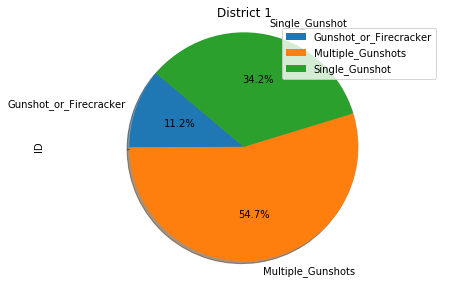

In [98]:
district1_pie = d1.plot(kind="pie", y= shots , title=("District 1" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

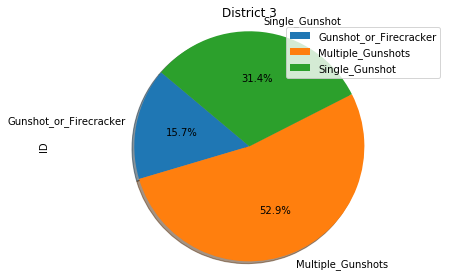

In [99]:
district1_pie = d3.plot(kind="pie", y= shots , title=("District 3" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

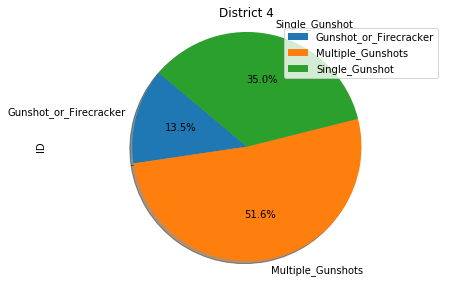

In [100]:
district1_pie = d4.plot(kind="pie", y= shots , title=("District 4" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

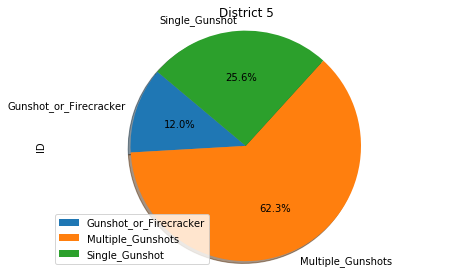

In [101]:
district1_pie = d5.plot(kind="pie", y= shots , title=("District 5" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

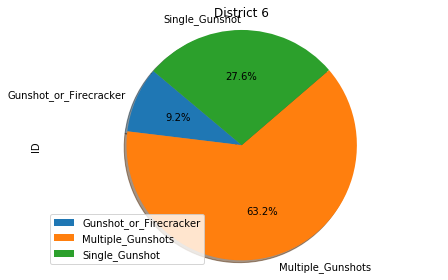

In [102]:
district1_pie = d6.plot(kind="pie", y= shots , title=("District 6" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

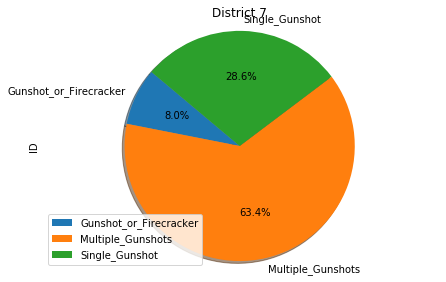

In [103]:
district1_pie = d7.plot(kind="pie", y= shots , title=("District 7" ),
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.tight_layout()
plt.show()

In [127]:
df_new2 = shootingdata.loc[:,['Deparment','ID']]
shotstotal = df_new.groupby(['Deparment'])

shotstotal.head()

sum_it_up2 = shotstotal.count()
sum_it_up2
total = sum_it_up2.loc

ID  Type
Deparment                 
WashingtonDC1D   161   161
WashingtonDC3D   172   172
WashingtonDC4D   223   223
WashingtonDC5D   632   632
WashingtonDC6D  2186  2186
WashingtonDC7D  2580  2580